In [60]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from time import time
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt

## 1.      (1 балл) Выбрать и загрузить  датасет с помощью библиотеки Pandas. Датасет должен относиться к задаче классификации, содержать категориальные данные.

In [3]:
data = pd.read_csv('Hotel Reservations.csv')
data.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


## Реализовать код, вносящий случайные искажения в данные.

In [4]:
for column in ['avg_price_per_room', 'market_segment_type', 'no_of_children']:
    indices = np.random.choice(data.index, size=1000, replace=False)
    data.loc[indices, column] = np.nan

## 2.      (1 балл) С помощью библиотеки Pandas произвести предварительный анализ датасета на наличие пропусков и искажений. Произвести исправление данных, используя 3 различные стратегии.

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        35275 non-null  float64
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

In [6]:
data.describe()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
count,36275.000000,35275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,35275.000000,36275.000000
mean,1.844962,0.105344,0.810724,2.204300,0.030986,85.232557,2017.820427,7.423653,15.596995,0.025637,0.023349,0.153411,103.459442,0.619655
std,0.518715,0.402639,0.870644,1.410905,0.173281,85.930817,0.383836,3.069894,8.740447,0.158053,0.368331,1.754171,35.110658,0.786236
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2017.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,1.000000,0.000000,17.000000,2018.000000,5.000000,8.000000,0.000000,0.000000,0.000000,80.310000,0.000000
50%,2.000000,0.000000,1.000000,2.000000,0.000000,57.000000,2018.000000,8.000000,16.000000,0.000000,0.000000,0.000000,99.450000,0.000000
75%,2.000000,0.000000,2.000000,3.000000,0.000000,126.000000,2018.000000,10.000000,23.000000,0.000000,0.000000,0.000000,120.150000,1.000000
max,4.000000,10.000000,7.000000,17.000000,1.000000,443.000000,2018.000000,12.000000,31.000000,1.000000,13.000000,58.000000,540.000000,5.000000


In [7]:
median_child = data['no_of_children'].median()
mode_market_segment_type = data['market_segment_type'].mode()[0]
avg_price = data['avg_price_per_room'].mean()

data.fillna({'no_of_children' : median_child, 'market_segment_type' : mode_market_segment_type, 'avg_price_per_room' : avg_price}, inplace = True)


In [8]:
data.isnull().sum()

Booking_ID                              0
no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

In [9]:
for el in ['market_segment_type', 'room_type_reserved', 'market_segment_type', 'booking_status']:
    print(f'Unique values of {el} column: {data[el].unique()}')

Unique values of market_segment_type column: ['Offline' 'Online' 'Corporate' 'Aviation' 'Complementary']
Unique values of room_type_reserved column: ['Room_Type 1' 'Room_Type 4' 'Room_Type 2' 'Room_Type 6' 'Room_Type 5'
 'Room_Type 7' 'Room_Type 3']
Unique values of market_segment_type column: ['Offline' 'Online' 'Corporate' 'Aviation' 'Complementary']
Unique values of booking_status column: ['Not_Canceled' 'Canceled']


## 4.      (1 балл) Произвести кодирование категориальных признаков. Применить one-hot-encoding. Произвести стандартизацию данных.

In [10]:
y = [1 if el == 'Canceled' else 0 for el in data.booking_status]
X = data.drop(columns = ['booking_status', 'Booking_ID'])

In [11]:
cat = X.select_dtypes(include=['object']).columns.tolist()

# Применяем one-hot encoding и объединяем с числовыми колонками
X = pd.concat([pd.get_dummies(X[cat], drop_first=True), X.drop(columns=cat)], axis=1)

In [12]:
cols = X.columns
X = pd.DataFrame(StandardScaler().fit(X).transform(X), columns = cols)

In [13]:
X.head()

,type_of_meal_plan_Meal Plan 2,type_of_meal_plan_Meal Plan 3,type_of_meal_plan_Not Selected,room_type_reserved_Room_Type 2,room_type_reserved_Room_Type 3,room_type_reserved_Room_Type 4,room_type_reserved_Room_Type 5,room_type_reserved_Room_Type 6,room_type_reserved_Room_Type 7,market_segment_type_Complementary,...,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
0,-0.316611,-0.011741,-0.405849,-0.139454,-0.013893,-0.447709,-0.085785,-0.165404,-0.066141,-0.103027,...,-0.178819,1.614896,-2.137469,0.839242,-1.555662,-0.16221,-0.063393,-0.087456,-1.110811,-0.78814
1,-0.316611,-0.011741,2.463970,-0.139454,-0.013893,-0.447709,-0.085785,-0.165404,-0.066141,-0.103027,...,-0.178819,-0.933701,0.467843,1.164990,-1.098013,-0.16221,-0.063393,-0.087456,0.093018,0.48376
2,-0.316611,-0.011741,-0.405849,-0.139454,-0.013893,-0.447709,-0.085785,-0.165404,-0.066141,-0.103027,...,-0.178819,-0.980250,0.467843,-1.766747,1.419055,-0.16221,-0.063393,-0.087456,-1.255225,-0.78814
3,-0.316611,-0.011741,-0.405849,-0.139454,-0.013893,-0.447709,-0.085785,-0.165404,-0.066141,-0.103027,...,-0.178819,1.463610,0.467843,-0.789501,0.503757,-0.16221,-0.063393,-0.087456,-0.099918,-0.78814
4,-0.316611,-0.011741,2.463970,-0.139454,-0.013893,-0.447709,-0.085785,-0.165404,-0.066141,-0.103027,...,-0.178819,-0.433291,0.467843,-1.115250,-0.525952,-0.16221,-0.063393,-0.087456,-0.258773,-0.78814


## 5.      (2 балла) Разделить данные на обучающий и проверочный наборы. Решить задачу классификации, используя  библиотеку sklearn тремя способами (логистическая регрессия, метод опорных векторов, случайный лес), сравнить полученные результаты (метод score) для обучающих и проверочных данных. Сделать выводы.

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [21]:
for clf in [LogisticRegression(), SVC(),RandomForestClassifier()]:
    st = time()
    clf.fit(X_train, y_train)
    print(f'Train score of {clf} = {clf.score(X_train, y_train)}')
    print(f'Test score of {clf} = {clf.score(X_test, y_test)}')
    print(f'Fit_predict time of {clf} = {time() - st} seconds')


Train score of LogisticRegression() = 0.7991729841488628
Test score of LogisticRegression() = 0.8181943487250173
Fit_predict time of LogisticRegression() = 0.10053491592407227 seconds
Train score of SVC() = 0.8410751206064783
Test score of SVC() = 0.8435561681598898
Fit_predict time of SVC() = 118.72196674346924 seconds
Train score of RandomForestClassifier() = 0.9943831840110269
Test score of RandomForestClassifier() = 0.9035148173673329
Fit_predict time of RandomForestClassifier() = 6.031247854232788 seconds


## 6.      (2 балла) Применить три подхода к понижению размерности путем отбора признаков (L1 регуляризация, последовательный отбор признаков, дерево решений). Сравнить полученные результаты. Сделать выводы.

Как видим, быстрее всех обучилась логистическая регрессия, но она показала и самый худший скор. А вот лес показал очень хороший скор и обучался тоже совсем не долго

In [56]:
lg = LogisticRegression(penalty = 'l1', solver='liblinear', C = 0.001)
lg.fit(X_train, y_train)
cf = lg.coef_

X.columns[np.where(cf >0)[1]]

Index(['market_segment_type_Online', 'lead_time', 'arrival_year',
       'avg_price_per_room'],
      dtype='object')

In [57]:
sfs = SequentialFeatureSelector(LogisticRegression(), n_features_to_select=4, direction='forward')
sfs.fit(X_train, y_train)
selected_features = X.columns[sfs.get_support()]


selected_features

Index(['market_segment_type_Online', 'lead_time', 'avg_price_per_room',
       'no_of_special_requests'],
      dtype='object')

In [58]:
tree = DecisionTreeClassifier(random_state=42)
tree.fit(X_train, y_train)
importances = tree.feature_importances_
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)[:5]

feature_importance

,Feature,Importance
18,lead_time,0.351335
25,avg_price_per_room,0.174099
12,market_segment_type_Online,0.084408
21,arrival_date,0.083196
26,no_of_special_requests,0.070645


In [71]:
feats = feature_importance.Feature.tolist()

new_X = X[feats]

## 3.      (1 балл) С помощью библиотеки matplotlib построить графики исходных данных для каждой пары признаков (если набор данных позволяет это, в противном случае вернуться к этому пункту после уменьшения размерности в п.6). Сделать выводы о зависимости признаков.

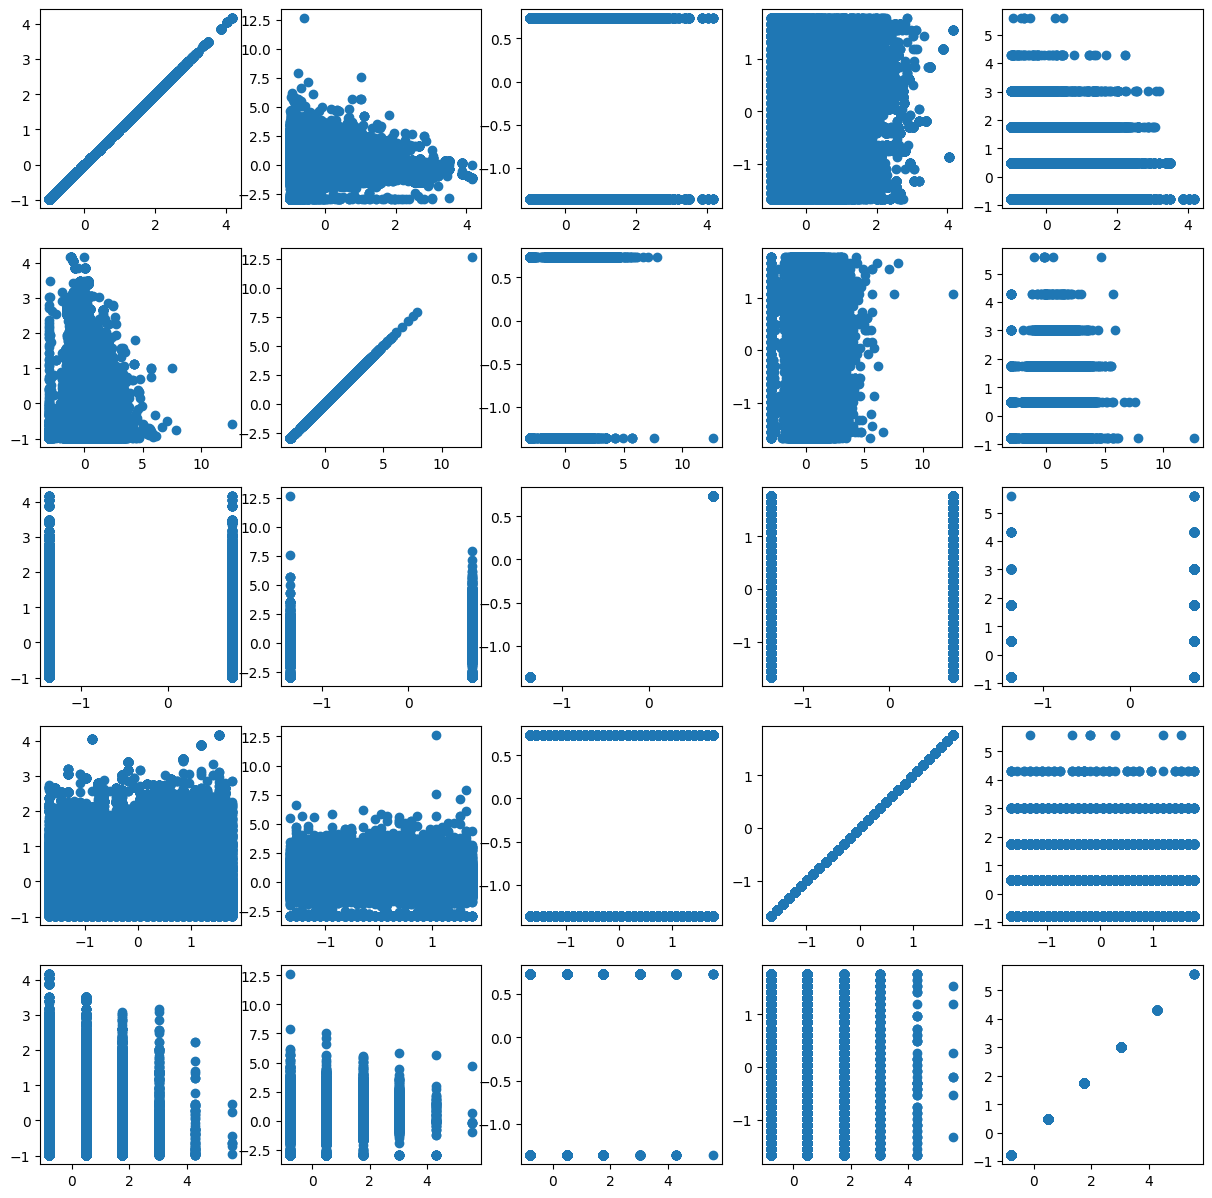

In [76]:
fig, ax = plt.subplots(len(feats), len(feats), figsize =(15, 15))
for i in range(len(feats)):
    for j in range(len(feats)):
        ax[i,j].scatter(new_X[feats[i]], new_X[feats[j]])

## Явных зависимостей нет(
